### IMPORTING LIBRARIES

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING THE DATASET

In [4]:
df = pd.read_csv("Top-100 Trending Books.csv")
df

,Rank,book title,book price,rating,author,year of publication,genre,url
0,1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance,amazon.com/Iron-Flame-Empyrean-Rebecca-Yarros/...
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...
2,3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography,amazon.com/My-Name-Barbra-Streisand/dp/0525429...
3,4,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir,amazon.com/Friends-Lovers-Big-Terrible-Thing/d...
4,5,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction",amazon.com/How-Catch-Turkey-Adam-Wallace/dp/14...
...,...,...,...,...,...,...,...,...
95,96,First Little Readers Parent Pack: Guided Readi...,11.40,4.7,Deborah Schecter,2010,Nonfiction,amazon.com/First-Little-Readers-Parent-Pack/dp...
96,97,Hatchet,5.14,4.7,Gary Paulsen,1987,"young adult novel, adventure novel, survival ...",amazon.com/Hatchet-Gary-Paulsen/dp/1416936475/...
97,98,"The Wager: A Tale of Shipwreck, Mutiny and Murder",15.30,4.5,David Grann,2023,Nonfiction,amazon.com/Wager-Tale-Shipwreck-Mutiny-Murder/...
98,99,"I'm Dead, Now What?: Important Information Abo...",12.99,4.6,Peter Pauper Press,2015,Nonfiction,amazon.com/Important-Information-Belongings-Bu...


In [5]:
dataset = df.copy()

### EXPLORE THE DATASET

This dataset offers an in-depth look into Amazon's top 100 Bestselling books along with their customer reviews.The dataset has two parts.The first part is related to book deatils and the second part shows the reviews and ratings for that book

In [11]:
df.columns

Index(['Rank', 'book title', 'book price', 'rating', 'author',
       'year of publication', 'genre', 'url'],
      dtype='object')

**features :**

    Rank: indicates the position of the book in the list
    Book Title: title of the book
    Book Price:price of the book
    Rating: indicates the average rating given by readers who have reviewed the book
    Author: name of the author(s) who wrote the book
    Year of Publication: the year in which the book was published
    Genre: categorizes the book into a specific genre or genres
    URL: URL or web link that leads to the book's page on Amazon


### MISSING AND DUPLICATE VALUES

In [6]:
df.isnull().sum()

Rank                   0
book title             0
book price             0
rating                 3
author                 0
year of publication    0
genre                  0
url                    0
dtype: int64

<Axes: >

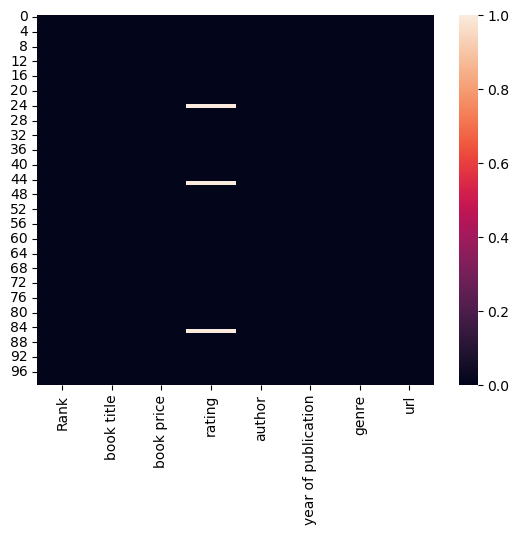

In [7]:
sns.heatmap(df.isnull())

- there are some null values in the rating column

In [8]:
df.duplicated().any()

False

- there is no any duplicate values

### filling nan values

In [9]:
df['rating'].fillna(df['rating'].mean(), inplace=True)

In [10]:
df.isnull().sum()

Rank                   0
book title             0
book price             0
rating                 0
author                 0
year of publication    0
genre                  0
url                    0
dtype: int64

- now nan values are filled

### DESCRIPTIVE ANALYSIS

In [14]:
df.describe()

,Rank,book price,rating,year of publication
count,100.000000,100.000000,100.000000,100.00000
mean,50.500000,12.708600,4.689691,2013.76000
std,29.011492,7.915568,0.178368,15.13049
min,1.000000,2.780000,4.100000,1947.00000
25%,25.750000,6.302500,4.600000,2014.00000
50%,50.500000,11.480000,4.700000,2019.00000
75%,75.250000,16.990000,4.800000,2023.00000
max,100.000000,48.770000,5.000000,2024.00000


- There are 100 entries in the dataset.
- The ranks vary with a standard deviation of 29.01, suggesting a wide spread.
- The average book price is 12.71.
- The minimum rating is 4.1, and the maximum rating is 5.0.
- The earliest publication year is 1947, and the latest is 2024.


### EDA

### UNIVARIABLE ANALYSIS

###### distribution of ratings 

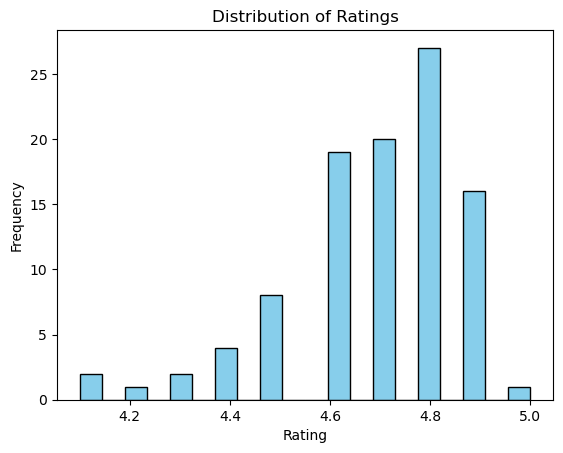

In [15]:
plt.hist(df['rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

- The minimum rating is 4.1, and the maximum rating is 5.0.
- most people rated 4.8

###### presence of outliers and the distribution of ratings

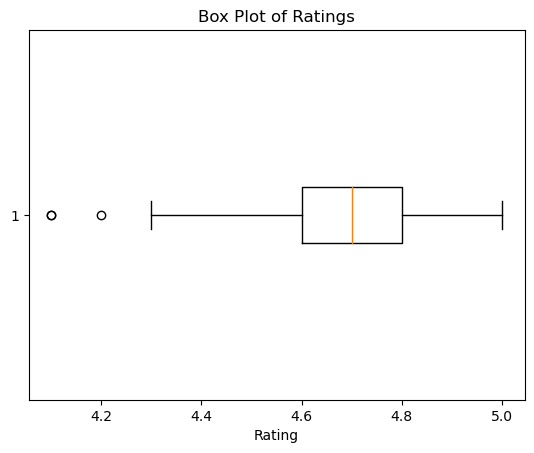

In [16]:
plt.boxplot(df['rating'], vert=False)
plt.title('Box Plot of Ratings')
plt.xlabel('Rating')
plt.show()

- The minimum rating is 4.1, and the maximum rating is 5.0.
- from 4.3 to 5.0 have rated more

###### book

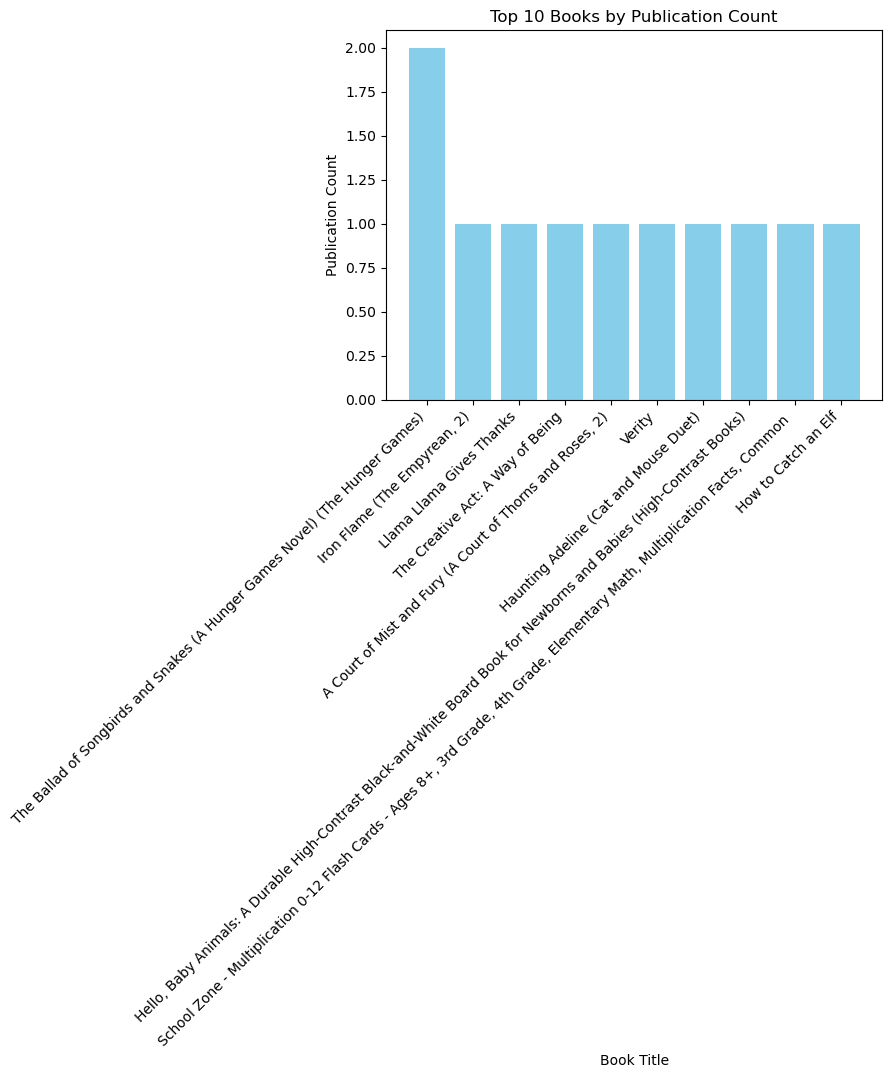

In [17]:
# Top 10 books by publication count
top_books = df['book title'].value_counts().head(10)
plt.bar(top_books.index, top_books.values, color='skyblue')
plt.title('Top 10 Books by Publication Count')
plt.xlabel('Book Title')
plt.ylabel('Publication Count')
plt.xticks(rotation=45, ha='right')
plt.show()



In [19]:
top_books

The Ballad of Songbirds and Snakes (A Hunger Games Novel) (The Hunger Games)                                                     2
Iron Flame (The Empyrean, 2)                                                                                                     1
Llama Llama Gives Thanks                                                                                                         1
The Creative Act: A Way of Being                                                                                                 1
A Court of Mist and Fury (A Court of Thorns and Roses, 2)                                                                        1
Verity                                                                                                                           1
Haunting Adeline (Cat and Mouse Duet)                                                                                            1
Hello, Baby Animals: A Durable High-Contrast Black-and-White Board Book for Newborn

- The Ballad of Songbirds and Snakes (A Hunger Games Novel) (The Hunger Games)  was published more

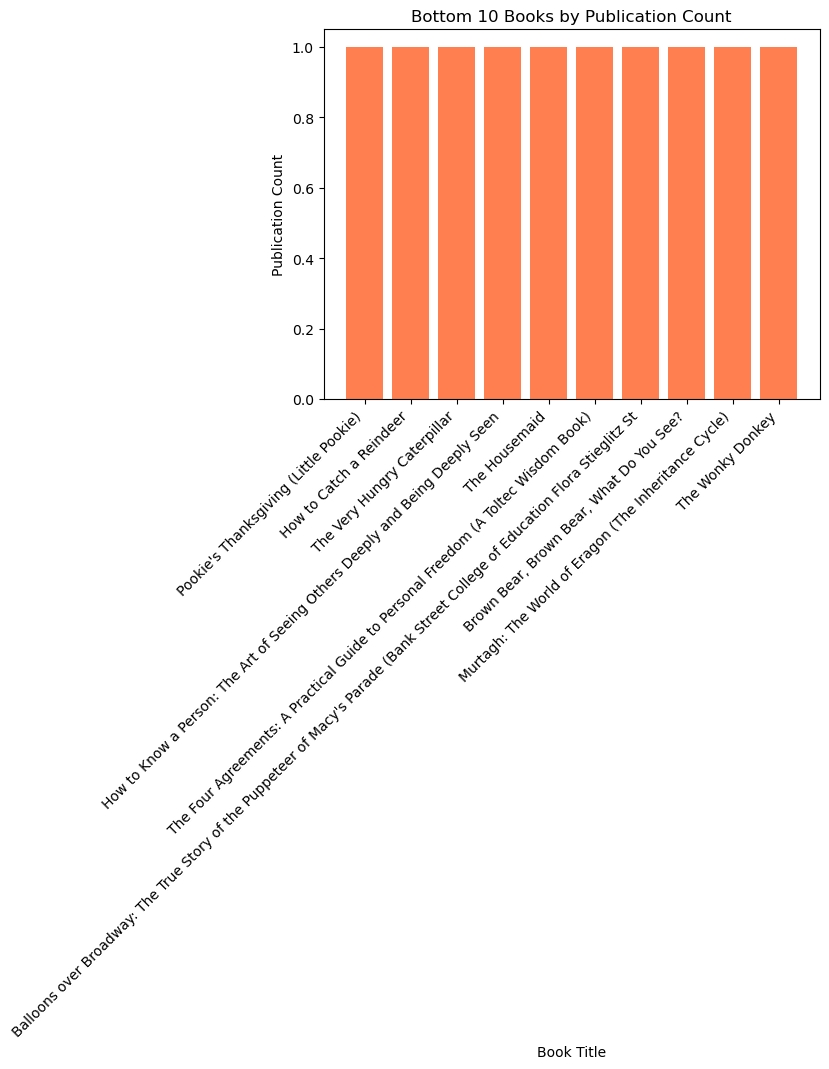

In [18]:
# Bottom 10 books by publication count
bottom_books = df['book title'].value_counts().tail(10)
plt.bar(bottom_books.index, bottom_books.values, color='coral')
plt.title('Bottom 10 Books by Publication Count')
plt.xlabel('Book Title')
plt.ylabel('Publication Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
bottom_books

Pookie's Thanksgiving (Little Pookie)                                                                                            1
How to Catch a Reindeer                                                                                                          1
The Very Hungry Caterpillar                                                                                                      1
How to Know a Person: The Art of Seeing Others Deeply and Being Deeply Seen                                                      1
The Housemaid                                                                                                                    1
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)                                                1
Balloons over Broadway: The True Story of the Puppeteer of Macy's Parade (Bank Street College of Education Flora Stieglitz St    1
Brown Bear, Brown Bear, What Do You See?                                           

- other books are published only 1

###### author's 

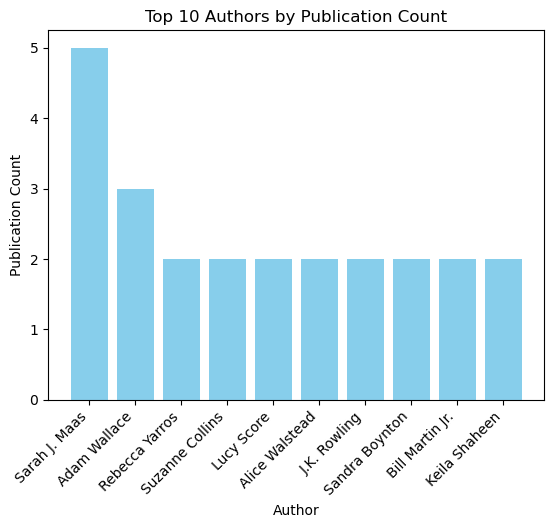

In [21]:
top_authors = df['author'].value_counts().head(10)
plt.bar(top_authors.index, top_authors.values, color='skyblue')
plt.title('Top 10 Authors by Publication Count')
plt.xlabel('Author')
plt.ylabel('Publication Count')
plt.xticks(rotation=45, ha='right')
plt.show()

- Sarah.J.Maas's book was published more

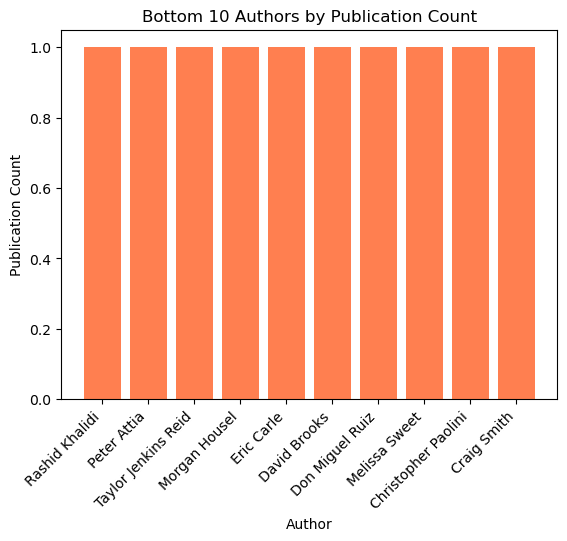

In [22]:
bottom_authors = df['author'].value_counts().tail(10)
plt.bar(bottom_authors.index, bottom_authors.values, color='coral')
plt.title('Bottom 10 Authors by Publication Count')
plt.xlabel('Author')
plt.ylabel('Publication Count')
plt.xticks(rotation=45, ha='right')
plt.show()

###### In which year are books published more and less?

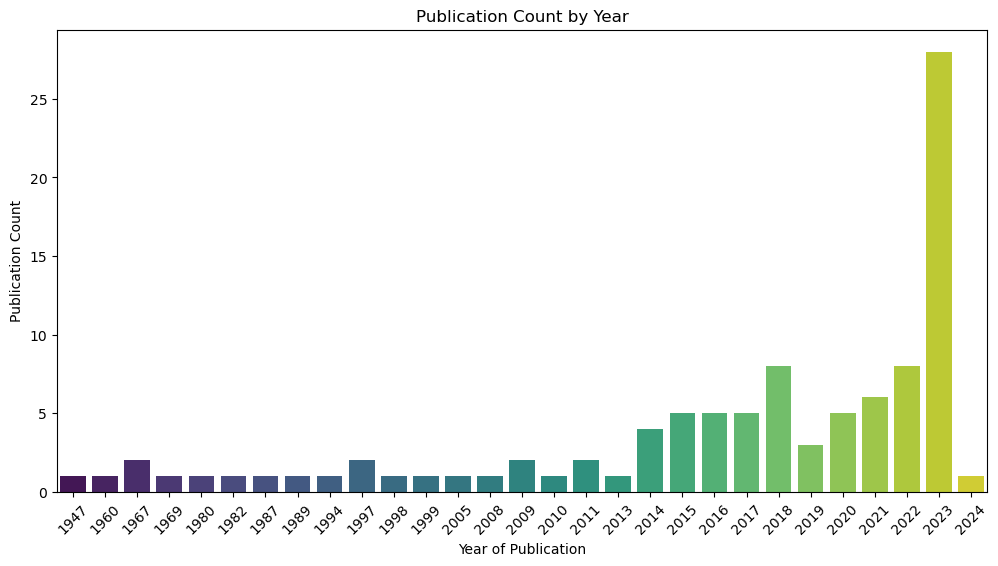

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year of publication', data=df, palette='viridis')
plt.title('Publication Count by Year')
plt.xlabel('Year of Publication')
plt.ylabel('Publication Count')
plt.xticks(rotation=45)
plt.show()

- in 2023 were more books get published

###### genre

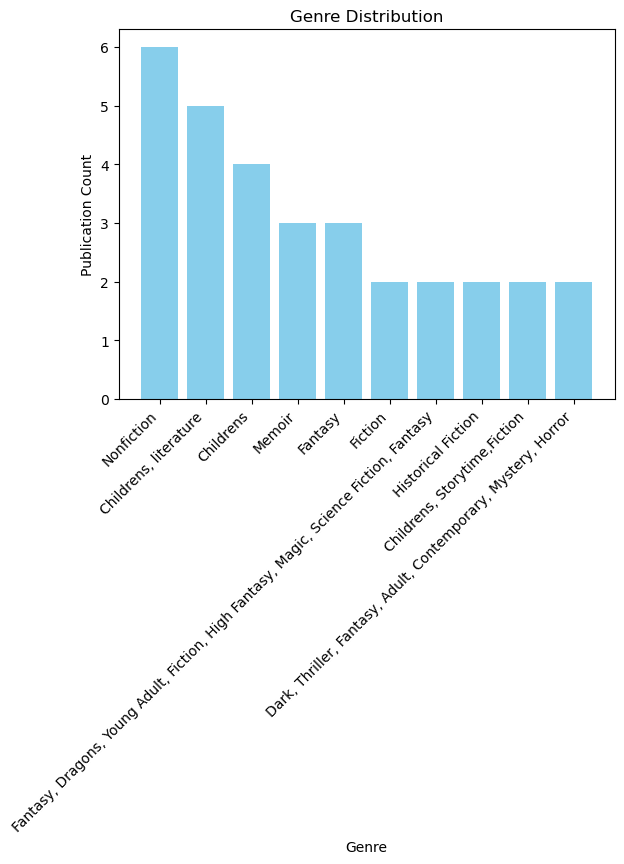

In [25]:
genre_counts = df['genre'].value_counts()[:10]
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Publication Count')
plt.xticks(rotation=45, ha='right')
plt.show()

- non fiction's are more published

### MORE EXPLORING

###### Comparison of Ratings in Different Genres

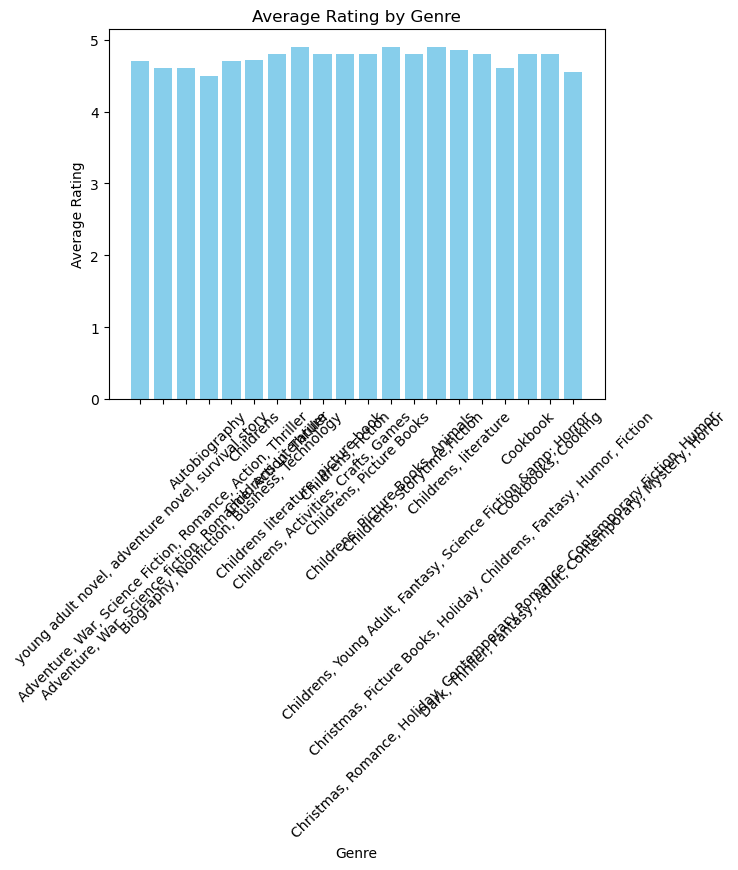

In [32]:
genre_avg_rating = df.groupby('genre')['rating'].mean()[:20]
plt.bar(genre_avg_rating.index, genre_avg_rating.values, color='skyblue')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [34]:
genre_avg_rating = df.groupby('genre')['rating'].mean()[:20]
genre_avg_rating

genre
 young adult novel, adventure novel, survival story                               4.700
Adventure, War, Science Fiction, Romance, Action, Thriller                        4.600
Adventure, War, Science fiction, Romance, Action, Thriller                        4.600
Autobiography                                                                     4.500
Biography, Nonfiction, Business, Technology                                       4.700
Childrens                                                                         4.725
Childrens Literature                                                              4.800
Childrens literature, picture book                                                4.900
Childrens, Activities, Crafts, Games                                              4.800
Childrens, Fiction                                                                4.800
Childrens, Picture Books                                                          4.800
Childrens, Picture Books, 

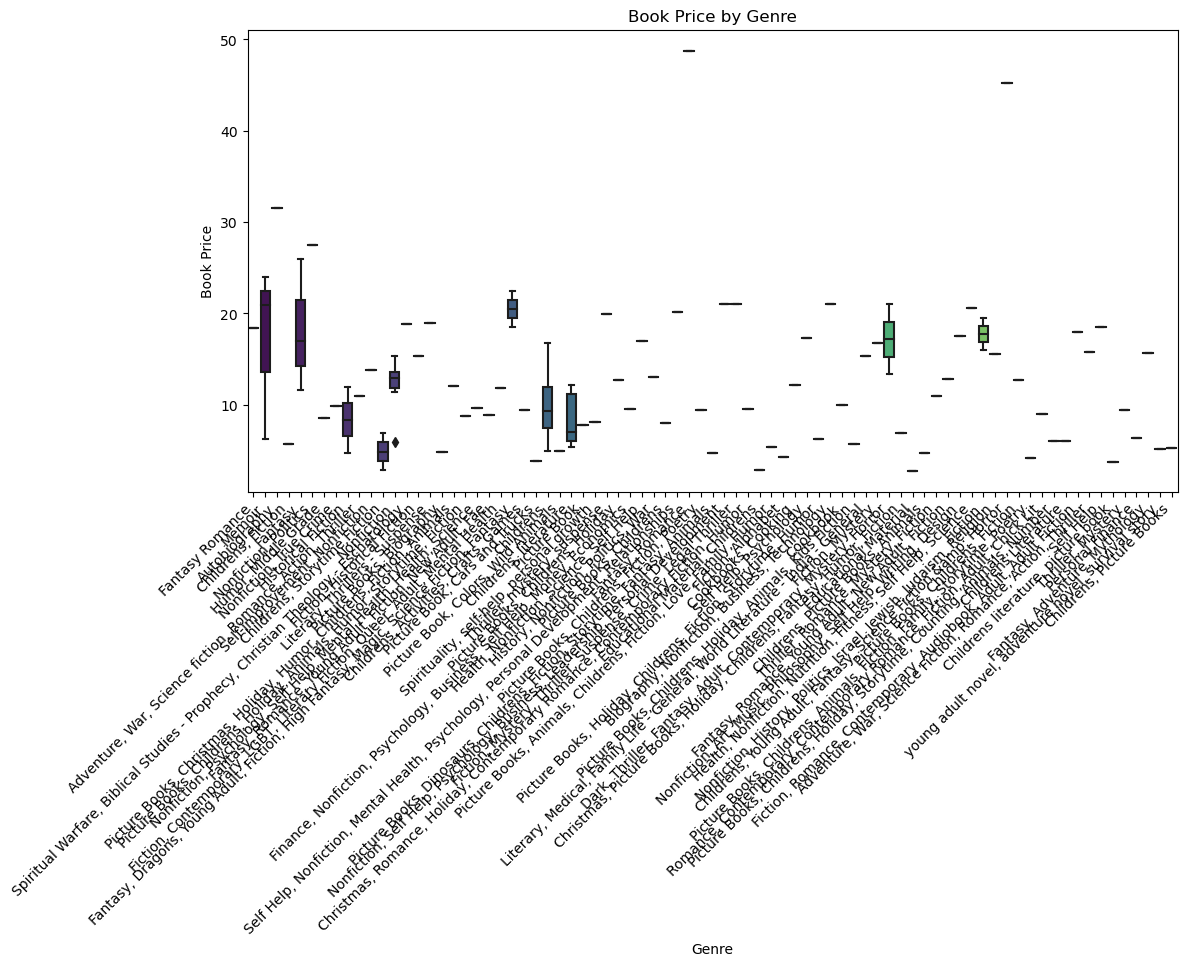

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='book price', data=df, palette='viridis')
plt.title('Book Price by Genre')
plt.xlabel('Genre')
plt.ylabel('Book Price')
plt.xticks(rotation=45, ha='right')
plt.show()

In [36]:
author_stats = df.groupby('author')['rating'].agg(['count', 'mean'])
author_stats.sort_values(by='count', ascending=False, inplace=True)

# Display top 10 authors by book count and their average ratings
print(author_stats.head(10))

                 count      mean
author                          
Sarah J. Maas        5  4.737938
Adam Wallace         3  4.800000
David Grann          2  4.450000
Lucy Score           2  4.550000
Suzanne Collins      2  4.600000
Bill Martin Jr.      2  4.900000
Alice Walstead       2  4.700000
J.K. Rowling         2  4.900000
Rebecca Yarros       2  4.450000
Keila Shaheen        2  4.650000


In [37]:
coorelation = df.corr()

<Axes: >

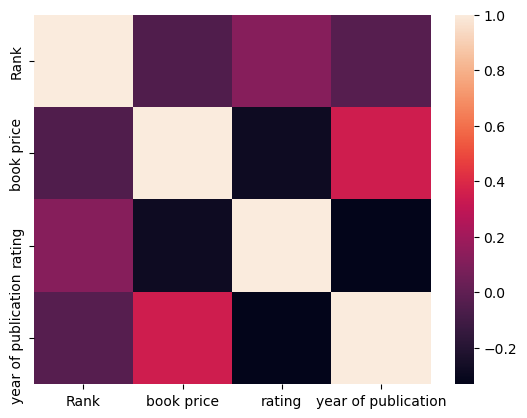

In [38]:
sns.heatmap(coorelation)

- There is a weak negative correlation (-0.056) between the book's rank and its price. 
-  There is a weak positive correlation (0.115) between the book's rank and its rating. 
-  There is a weak negative correlation (-0.034) between the book's rank and the year of publication.
-  There is a moderate negative correlation (-0.283) between the book's price and its rating.
- There is a moderate positive correlation (0.348) between the book's price and the year of publication. 
- There is a moderate negative correlation (-0.333) between the book's rating and the year of publication. 

**CONCLUSIONS :**
- The minimum rating is 4.1, and the maximum rating is 5.0.
- most people rated 4.8
- The Ballad of Songbirds and Snakes (A Hunger Games Novel) (The Hunger Games)  was published more
- Sarah.J.Maas's book was published more
- in 2023 were more books get published
- non fiction's are more published
- top 10 authors by book count and their average ratings

        Sarah J. Maas        5  4.737938
        Adam Wallace         3  4.800000
        David Grann          2  4.450000
        Lucy Score           2  4.550000
        Suzanne Collins      2  4.600000
        Bill Martin Jr.      2  4.900000
        Alice Walstead       2  4.700000
        J.K. Rowling         2  4.900000
        Rebecca Yarros       2  4.450000
        Keila Shaheen        2  4.650000
        
- There is a weak negative correlation (-0.056) between the book's rank and its price. 
- There is a weak positive correlation (0.115) between the book's rank and its rating. 
- There is a weak negative correlation (-0.034) between the book's rank and the year of publication.
- There is a moderate negative correlation (-0.283) between the book's price and its rating.
- There is a moderate positive correlation (0.348) between the book's price and the year of publication. 
- There is a moderate negative correlation (-0.333) between the book's rating and the year of publication. 